In [1]:
%pylab inline  
import GPy
import GPyOpt
import numpy as np
import  Functions
from Functions import *

Populating the interactive namespace from numpy and matplotlib


In [32]:
def f_with_hm_noise(X):
     # target function  + homoscadastic noise
    return np.sin (X) * (1 + np.abs (X)) + np.random.normal(loc=0.0, scale=2, size=(X.shape[0], 1)).reshape (-1, )


def f_with_ht_noise(X):
     # target function  + heteroscadastic noise
    return np.sin (X) * (1 + np.abs (X)) + \
        0.5 * np.random.multivariate_normal(np.zeros(X.reshape(-1, ).shape[0]), np.diag(abs (X.reshape (-1, ))**2), 1)[0]

def f_without_noise(X):
    return np.sin (X) * (1 + np.abs (X))


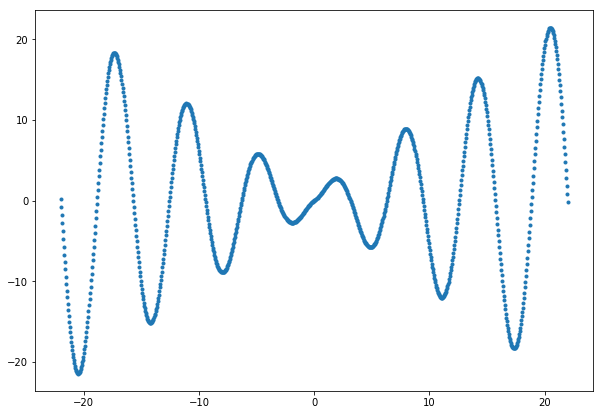

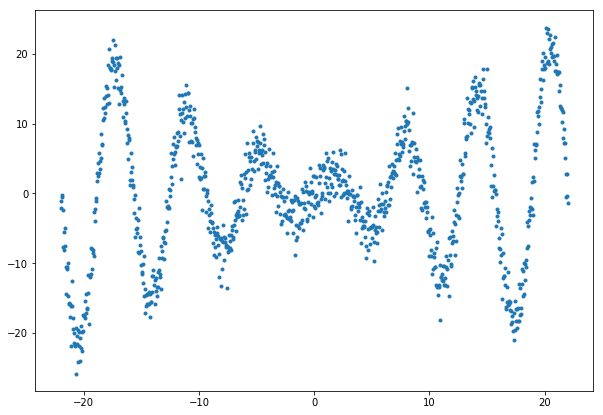

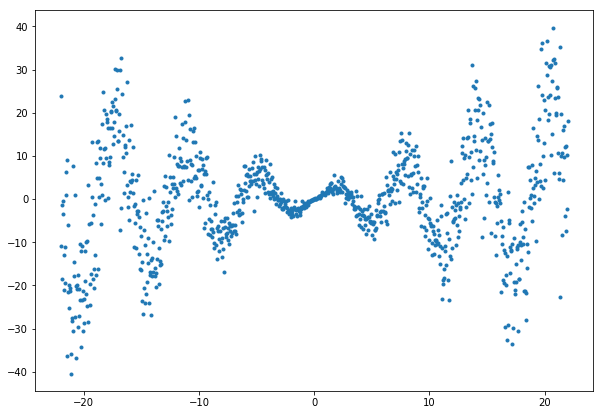

In [33]:
N = 1000
X = np.linspace(-22, 22, N)

y = f_without_noise(X) 
pyplot.figure(figsize = (10, 7))
pyplot.plot(X, y, '.')

y = f_with_hm_noise(X) 
pyplot.figure(figsize = (10, 7))
pyplot.plot(X, y, '.')

y = f_with_ht_noise(X) 
pyplot.figure(figsize = (10, 7))
pyplot.plot(X, y, '.')


In [34]:
bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (-22, 22)}]  # problem constraints 


#these constants are responsible for the number of iterations of the optimization algorithm
max_iter_for_func = 30
max_time = 120   # time budget 
eps      = 10e-6  # Minimum allows distance between the las two observations


# six arrays for storing optimal values
x_opt_without_noise = np.array([])
x_opt_with_hm_noise = np.array([])
x_opt_with_ht_noise = np.array([])

y_opt_without_noise = np.array([])
y_opt_with_hm_noise = np.array([])
y_opt_with_ht_noise = np.array([])

iter_opt = 50
for i in range(iter_opt):
    bayes_opt_without_noise = GPyOpt.methods.BayesianOptimization(f = f_without_noise,# function to optimize       
                                                domain = bounds, # box-constraints of the problem
                                                acquisition_type = 'EI',
                                                exact_feval = True) # Selects the Expected improvement

    bayes_opt_without_noise.run_optimization(max_iter_for_func, max_time, eps)     
    
    x_opt_without_noise = np.append (x_opt_without_noise, bayes_opt_without_noise.x_opt)
    
    
    
    
    bayes_opt_with_hm_noise = GPyOpt.methods.BayesianOptimization(f=f_with_hm_noise,# function to optimize       
                                                domain=bounds, # box-constraints of the problem
                                                acquisition_type='EI',
                                                 exact_feval = True) # Selects the Expected improvement

    bayes_opt_with_hm_noise.run_optimization(max_iter_for_func, max_time, eps) 
    
    x_opt_with_hm_noise = np.append (x_opt_with_hm_noise, bayes_opt_with_hm_noise.x_opt)
    
    
    
    bayes_opt_with_ht_noise = GPyOpt.methods.BayesianOptimization(f=f_with_ht_noise,# function to optimize       
                                                domain=bounds, # box-constraints of the problem
                                                acquisition_type='EI',
                                                 exact_feval = True) # Selects the Expected improvement

    bayes_opt_with_ht_noise.run_optimization(max_iter_for_func, max_time, eps) 
    
    x_opt_with_ht_noise = np.append (x_opt_with_ht_noise, bayes_opt_with_ht_noise.x_opt)
    

    
y_opt_without_noise = f_without_noise (x_opt_without_noise)
y_opt_with_hm_noise = f_without_noise (x_opt_with_hm_noise)
y_opt_with_ht_noise = f_without_noise (x_opt_with_ht_noise)    
print "y_opt_without_noise"
print "mean: ", y_opt_without_noise.mean(), "variance: ", y_opt_without_noise.var()
    
print "y_opt_with_hm_noise"
print "mean: ", y_opt_with_hm_noise.mean(), "variance: ", y_opt_with_hm_noise.var()
    
print "y_opt_with_ht_noise"
print "mean: ", y_opt_with_ht_noise.mean(), "variance: ", y_opt_with_ht_noise.var(),"\n"
    

y_opt_without_noise
mean:  -21.438250660820717 variance:  3.747979922109552e-05
y_opt_with_hm_noise
mean:  -19.020011933032688 variance:  14.610087815229074
y_opt_with_ht_noise
mean:  -15.513315035708796 variance:  26.834937969343024 

